<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data(y_hat)_add_delta_(1_6)_n250_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_1.6'

In [4]:
os.listdir(base_path)

['data_add_delta_1.6_n20.csv',
 'data_add_delta_1.6_n30.csv',
 'data_add_delta_1.6_n60.csv',
 'data_add_delta_1.6_n120.csv',
 'data_add_delta_1.6_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_1.6_n250.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    49.478397  31.875367  82.395914   6.793580  180.543258   
      1.0    74.881906  70.006776  92.875836  18.427718  266.192234   
      2.0    42.642662  75.697409  55.557111   4.079452  187.976633   
      3.0    90.718881  21.541878  53.094816 -17.042875  158.312701   
      4.0    85.402368  70.227312  78.819603 -51.030126  193.419157   
...                ...        ...        ...        ...         ...   
999.0 245.0  54.523131  95.980734  60.647124  93.585252  314.736242   
      246.0  55.494252  79.776291  59.437658  -4.583323  200.124878   
      247.0  65.456736  65.205118  71.099706  35.286274  247.047834   
      248.0  74.559827  48.118132  83.452587   6.190666  222.321212   
      249.0  45.600222  24.522540  78.851412 -12.140731  146.833442   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    175.054608   5.488650  
      1.0    249.283901  16.908334  
      2.0    183.492562   4.484071  
      3.0    175.471384 -17.158683  
      4.0    245.324370 -51.905213  
...                 ...        ...  
999.0 245.0  222.707005  92.029237  
      246.0  205.952767  -5.827889  
      247.0  214.154240  32.893594  
      248.0  219.525419   2.795792  
      249.0  158.202408 -11.368966  

[250000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    49.478397  31.875367  82.395914   6.793580  180.543258   
      1.0    74.881906  70.006776  92.875836  18.427718  266.192234   
      2.0    42.642662  75.697409  55.557111   4.079452  187.976633   
      3.0    90.718881  21.541878  53.094816 -17.042875  158.312701   
      4.0    85.402368  70.227312  78.819603 -51.030126  193.419157   
...                ...        ...        ...        ...         ...   
999.0 245.0  54.523131  95.980734  60.647124  93.585252  314.736242   
      246.0  55.494252  79.776291  59.437658  -4.583323  200.124878   
      247.0  65.456736  65.205118  71.099706  35.286274  247.047834   
      248.0  74.559827  48.118132  83.452587   6.190666  222.321212   
      249.0  45.600222  24.522540  78.851412 -12.140731  146.833442   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    175.054608   5.488650  
      1.0    249.283901  16.908334  
      2.0    183.492562   4.484071  
      3.0    175.471384 -17.158683  
      4.0    245.324370 -51.905213  
...                 ...        ...  
999.0 245.0  222.707005  92.029237  
      246.0  205.952767  -5.827889  
      247.0  214.154240  32.893594  
      248.0  219.525419   2.795792  
      249.0  158.202408 -11.368966  

[250000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,49.478397,31.875367,82.395914,6.793580,180.543258,175.054608,5.488650
1,0.0,1.0,74.881906,70.006776,92.875836,18.427718,266.192234,249.283901,16.908334
2,0.0,2.0,42.642662,75.697409,55.557111,4.079452,187.976633,183.492562,4.484071
3,0.0,3.0,90.718881,21.541878,53.094816,-17.042875,158.312701,175.471384,-17.158683
4,0.0,4.0,85.402368,70.227312,78.819603,-51.030126,193.419157,245.324370,-51.905213
...,...,...,...,...,...,...,...,...,...
249995,999.0,245.0,54.523131,95.980734,60.647124,93.585252,314.736242,222.707005,92.029237
249996,999.0,246.0,55.494252,79.776291,59.437658,-4.583323,200.124878,205.952767,-5.827889
249997,999.0,247.0,65.456736,65.205118,71.099706,35.286274,247.047834,214.154240,32.893594
249998,999.0,248.0,74.559827,48.118132,83.452587,6.190666,222.321212,219.525419,2.795792


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3          e           Y  \
rep   index                                                           
0.0   0.0    49.478397  31.875367  82.395914   6.793580  180.543258   
      1.0    74.881906  70.006776  92.875836  18.427718  266.192234   
      2.0    42.642662  75.697409  55.557111   4.079452  187.976633   
      3.0    90.718881  21.541878  53.094816 -17.042875  158.312701   
      4.0    85.402368  70.227312  78.819603 -51.030126  193.419157   
...                ...        ...        ...        ...         ...   
999.0 245.0  54.523131  95.980734  60.647124  93.585252  314.736242   
      246.0  55.494252  79.776291  59.437658  -4.583323  200.124878   
      247.0  65.456736  65.205118  71.099706  35.286274  247.047834   
      248.0  74.559827  48.118132  83.452587   6.190666  222.321212   
      249.0  45.600222  24.522540  78.851412 -12.140731  146.833442   

                  y_hat      e_hat  
rep   index                         
0.0   0.0    175.054608   5.488650  
      1.0    249.283901  16.908334  
      2.0    183.492562   4.484071  
      3.0    175.471384 -17.158683  
      4.0    245.324370 -51.905213  
...                 ...        ...  
999.0 245.0  222.707005  92.029237  
      246.0  205.952767  -5.827889  
      247.0  214.154240  32.893594  
      248.0  219.525419   2.795792  
      249.0  158.202408 -11.368966  

[250000 rows x 7 columns]

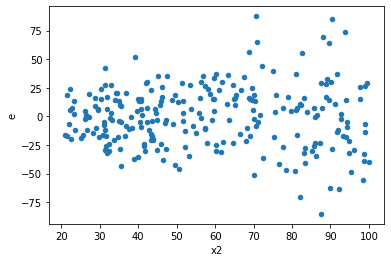

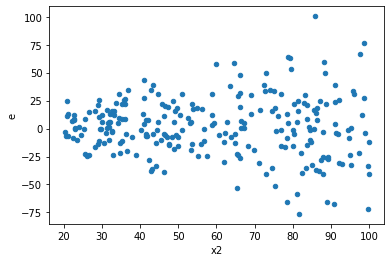

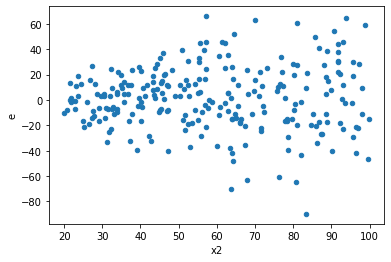

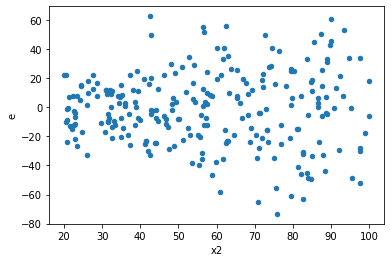

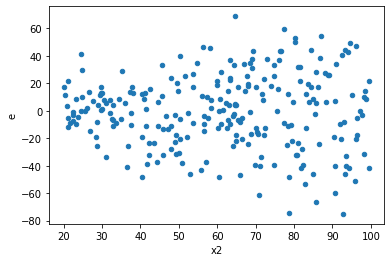

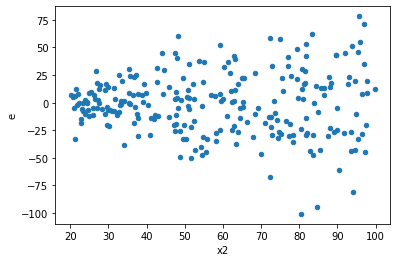

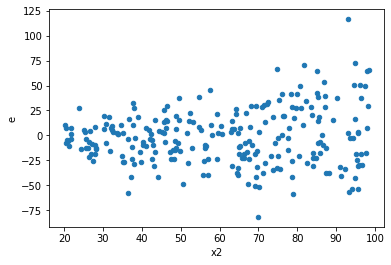

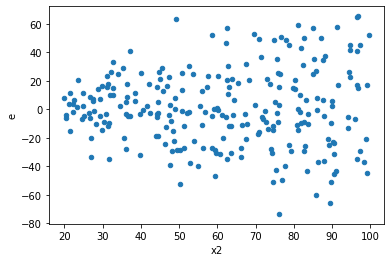

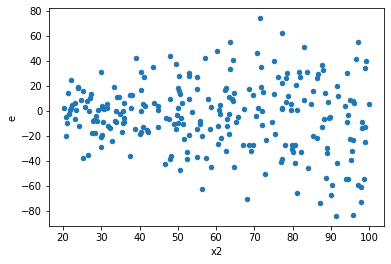

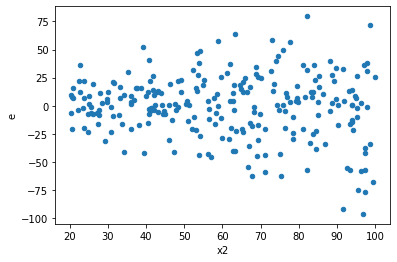

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,97.0,97.0,55650.03231486737,85209.32174028252,573.7116733491481,878.4466158792013,1.5311639220291728,0.03709353688150374,0.9814532315592481,0.01854676844075187,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,42957.92717040064,87009.61519212849,442.8652285608313,897.0063421868916,2.0254612110819177,0.0005996109816881479,0.9997001945091559,0.00029980549084407393,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,48384.81448873851,73612.18972586654,498.8125205024589,758.8885538749128,1.5213903474405106,0.04001198785950044,0.9799940060702498,0.02000599392975022,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,54004.429882975805,77117.62280071275,556.7466998244928,795.0270391826057,1.4279869812128705,0.08093143909058842,0.9595342804547058,0.04046571954529421,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,43821.11285231797,95608.91058223577,451.76405002389663,985.658871981812,2.181800149723455,0.0001536864909739144,0.999923156754513,7.68432454869572e-05,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,43250.34075342998,108286.94683168233,445.87980158175236,1116.3602766152817,2.503724709338726,9.313013111134083e-06,0.9999953434934444,4.6565065555670415e-06,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,51273.3389827669,78714.23864448037,528.5911235336794,811.4869963348492,1.5351884664842372,0.03595093034905017,0.9820245348254749,0.017975465174525085,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,39274.5150391236,97663.03298941112,404.89190761983093,1006.8353916434136,2.4866769937737834,1.0795080174652583e-05,0.9999946024599127,5.397540087326291e-06,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,49502.05367408983,92415.048664269,510.33045024834877,952.7324604563814,1.8668932257378348,0.0023502201844114445,0.9988248899077943,0.0011751100922057223,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,97.0,97.0,55650.03231486737,85209.32174028252,573.7116733491481,878.4466158792013,1.5311639220291728,0.03709353688150374,Reject001=1 : Homoscedasticity
1.0,97.0,97.0,42957.92717040064,87009.61519212849,442.8652285608313,897.0063421868916,2.0254612110819177,0.0005996109816881479,Reject001=0 : Heteroscedasticity
2.0,97.0,97.0,48384.81448873851,73612.18972586654,498.8125205024589,758.8885538749128,1.5213903474405106,0.04001198785950044,Reject001=1 : Homoscedasticity
3.0,97.0,97.0,54004.429882975805,77117.62280071275,556.7466998244928,795.0270391826057,1.4279869812128705,0.08093143909058842,Reject001=1 : Homoscedasticity
4.0,97.0,97.0,43821.11285231797,95608.91058223577,451.76405002389663,985.658871981812,2.181800149723455,0.0001536864909739144,Reject001=0 : Heteroscedasticity
5.0,97.0,97.0,43250.34075342998,108286.94683168233,445.87980158175236,1116.3602766152817,2.503724709338726,9.313013111134083e-06,Reject001=0 : Heteroscedasticity
6.0,97.0,97.0,51273.3389827669,78714.23864448037,528.5911235336794,811.4869963348492,1.5351884664842372,0.03595093034905017,Reject001=1 : Homoscedasticity
7.0,97.0,97.0,39274.5150391236,97663.03298941112,404.89190761983093,1006.8353916434136,2.4866769937737834,1.0795080174652583e-05,Reject001=0 : Heteroscedasticity
8.0,97.0,97.0,49502.05367408983,92415.048664269,510.33045024834877,952.7324604563814,1.8668932257378348,0.0023502201844114445,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    706
Reject001=1 : Homoscedasticity      294
Name: Result_test, dtype: int64